nombre de valeurs recues:  150528
Nombre de termes différents de 0 : 50176


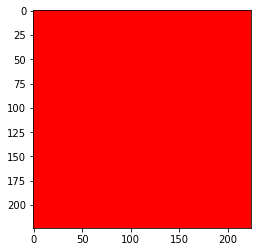

In [79]:
import serial
import numpy as np
import matplotlib.pyplot as plt

# Serial port configuration
port = '/dev/ttyUSB0'
baudrate = 115200
timeout = 10

# Open the serial port
ser = serial.Serial(port, baudrate, timeout=timeout)

# File to save the received audio data
filename = 'received_data.txt'

def convert_to_int8(data):
    data_str = data.decode('latin1')

    if data_str.startswith('\\x'):
        hex_value = data_str[2:]
        value = int(hex_value, 16)
    else:
        value = ord(data_str)
    
    return value

image_shape = (224, 224, 3)
image_size = 224*224*3
image = np.zeros(image_size, dtype=np.int16)
i = 0

while True:
    # Read data from the serial port
    data = ser.read()
    if (data == b''):
        break
    image[i] = convert_to_int8(data)
    i = i + 1

ser.close()

np.set_printoptions(threshold = np.inf)
print("Number of values received: ", i)

count_non_zero = len([x for x in image if x != 0])
print(f'Number of values different than 0 : {count_non_zero}')

reshaped_image = np.reshape(image, image_shape)

plt.imshow(reshaped_image)